In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# cancer数据集特征
# 这里的数据集其实就是 ../data/data.csv 只是 sklearn 有提供直接的加载方式
# 都是 Breast Cancer Wisconsin (Diagnostic) Data Set 这个数据集
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']

# 将数据划分为训练集测试集
cancer_data_train, cancer_data_test, cancer_target_train, cancer_target_test = train_test_split(cancer_data,
                                                                                                cancer_target,
                                                                                                test_size=0.2,
                                                                                                random_state=22)

In [6]:
# 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)

In [8]:
# 使用 SVM 算法来进行训练
svm = SVC().fit(cancer_trainStd, cancer_target_train)
# 测试集预测
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为：\n', cancer_target_pred[:20])

预测前20个结果为：
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [9]:
# 求出预测和真实一样的数目
true = np.sum(cancer_target_pred == cancer_target_test)
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', cancer_target_test.shape[0] - true)
print('预测结果准确率为：', true / cancer_target_test.shape[0])

预测对的结果数目为： 111
预测错的的结果数目为： 3
预测结果准确率为： 0.9736842105263158


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# 精确率和召回率的计算
print('使用SVM预测breast_cancer数据的准确率为：', accuracy_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测breast_cancer数据的精确率为：', precision_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测breast_cancer数据的召回率为：', recall_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测breast_cancer数据的F1值为：', f1_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测breast_cancer数据的Cohen’s Kappa系数为：', cohen_kappa_score(cancer_target_test, cancer_target_pred))

使用SVM预测breast_cancer数据的准确率为： 0.9736842105263158
使用SVM预测breast_cancer数据的精确率为： 0.9594594594594594
使用SVM预测breast_cancer数据的召回率为： 1.0
使用SVM预测breast_cancer数据的F1值为： 0.9793103448275862
使用SVM预测breast_cancer数据的Cohen’s Kappa系数为： 0.9432082364662903


In [12]:
from sklearn.metrics import classification_report

print('使用SVM预测iris数据的分类报告为：', '\n', classification_report(cancer_target_test, cancer_target_pred))

使用SVM预测iris数据的分类报告为： 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



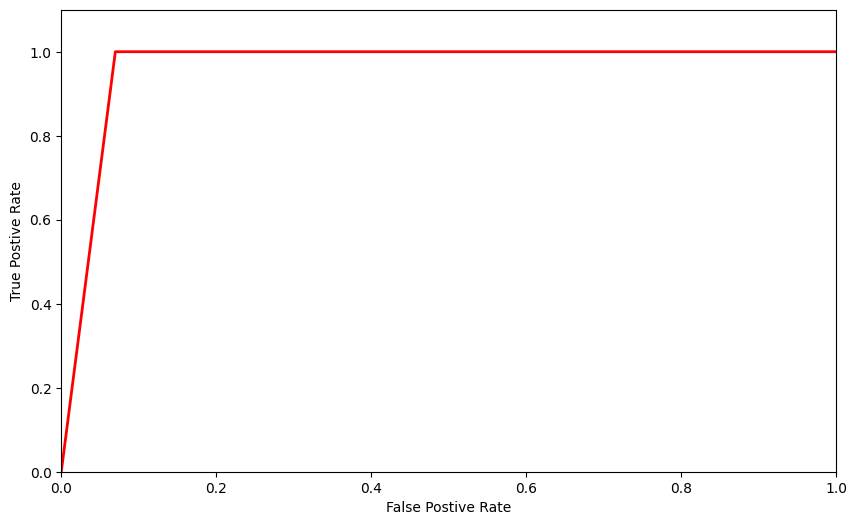

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

%matplotlib inline

# 求出ROC曲线的x轴和y轴
fpr, tpr, thresholds = roc_curve(cancer_target_test, cancer_target_pred)
plt.figure(figsize=(10, 6))
plt.xlim(0, 1)  ##设定x轴的范围
plt.ylim(0.0, 1.1)  ## 设定y轴的范围
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr, tpr, linewidth=2, linestyle="-", color='red')
plt.show()